In [2]:
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data


### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
### New features to explore: % message exchages with Poi, 
features_list = ['poi','salary'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

### Task 2: Remove outliers
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict
#my_dataset

### perform data exploration using pandas
import pandas as pd
df = pd.DataFrame(my_dataset)
df


### Extract features and labels from dataset for local testing
#data = featureFormat(my_dataset, features_list, sort_keys = True)
#labels, features = targetFeatureSplit(data)

### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
#from sklearn.naive_bayes import GaussianNB
#clf = GaussianNB()

### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
#from sklearn.cross_validation import train_test_split
#features_train, features_test, labels_train, labels_test = \
#    train_test_split(features, labels, test_size=0.3, random_state=42)

### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

#dump_classifier_and_data(clf, my_dataset, features_list)

,ALLEN PHILLIP K,BADUM JAMES P,BANNANTINE JAMES M,BAXTER JOHN C,BAY FRANKLIN R,BAZELIDES PHILIP J,BECK SALLY W,BELDEN TIMOTHY N,BELFER ROBERT,BERBERIAN DAVID,...,WASAFF GEORGE,WESTFAHL RICHARD K,WHALEY DAVID A,WHALLEY LAWRENCE G,WHITE JR THOMAS E,WINOKUR JR. HERBERT S,WODRASKA JOHN,WROBEL BRUCE,YEAGER F SCOTT,YEAP SOON
bonus,4175000,NaN,NaN,1200000,400000,NaN,700000,5249999,NaN,NaN,...,325000,NaN,NaN,3000000,450000,NaN,NaN,NaN,NaN,NaN
deferral_payments,2869717,178980,NaN,1295738,260455,684694,NaN,2144013,-102500,NaN,...,831299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deferred_income,-3081055,NaN,-5104,-1386055,-201641,NaN,NaN,-2334434,NaN,NaN,...,-583325,-10800,NaN,NaN,NaN,-25000,NaN,NaN,NaN,NaN
director_fees,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3285,NaN,...,NaN,NaN,NaN,NaN,NaN,108579,NaN,NaN,NaN,NaN
email_address,phillip.allen@enron.com,NaN,james.bannantine@enron.com,NaN,frank.bay@enron.com,NaN,sally.beck@enron.com,tim.belden@enron.com,NaN,david.berberian@enron.com,...,george.wasaff@enron.com,dick.westfahl@enron.com,NaN,greg.whalley@enron.com,thomas.white@enron.com,NaN,john.wodraska@enron.com,NaN,scott.yeager@enron.com,NaN
exercised_stock_options,1729541,257817,4046157,6680544,NaN,1599641,NaN,953136,3285,1624396,...,1668260,NaN,98718,3282960,1297049,NaN,NaN,139130,8308552,192758
expenses,13868,3486,56301,11200,129142,NaN,37172,17355,NaN,11892,...,NaN,51870,NaN,57838,81353,1413,NaN,NaN,53947,55097
from_messages,2195,NaN,29,NaN,NaN,NaN,4343,484,NaN,NaN,...,30,NaN,NaN,556,NaN,NaN,NaN,NaN,NaN,NaN
from_poi_to_this_person,47,NaN,39,NaN,NaN,NaN,144,228,NaN,NaN,...,22,NaN,NaN,186,NaN,NaN,NaN,NaN,NaN,NaN
from_this_person_to_poi,65,NaN,0,NaN,NaN,NaN,386,108,NaN,NaN,...,7,NaN,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, bonus to total_stock_value
Columns: 146 entries, ALLEN PHILLIP K to YEAP SOON
dtypes: object(146)
memory usage: 24.1+ KB


In [4]:
df.describe()

,ALLEN PHILLIP K,BADUM JAMES P,BANNANTINE JAMES M,BAXTER JOHN C,BAY FRANKLIN R,BAZELIDES PHILIP J,BECK SALLY W,BELDEN TIMOTHY N,BELFER ROBERT,BERBERIAN DAVID,...,WASAFF GEORGE,WESTFAHL RICHARD K,WHALEY DAVID A,WHALLEY LAWRENCE G,WHITE JR THOMAS E,WINOKUR JR. HERBERT S,WODRASKA JOHN,WROBEL BRUCE,YEAGER F SCOTT,YEAP SOON
count,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
unique,19,6,16,13,13,8,14,18,7,9,...,18,10,3,17,11,6,4,3,10,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,15,5,9,9,13,7,4,14,13,...,4,11,18,5,11,16,17,18,12,16


In [5]:
df_new = df.T
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, bonus to total_stock_value
Columns: 146 entries, ALLEN PHILLIP K to YEAP SOON
dtypes: object(146)
memory usage: 24.1+ KB


In [6]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
bonus                        146 non-null object
deferral_payments            146 non-null object
deferred_income              146 non-null object
director_fees                146 non-null object
email_address                146 non-null object
exercised_stock_options      146 non-null object
expenses                     146 non-null object
from_messages                146 non-null object
from_poi_to_this_person      146 non-null object
from_this_person_to_poi      146 non-null object
loan_advances                146 non-null object
long_term_incentive          146 non-null object
other                        146 non-null object
poi                          146 non-null object
restricted_stock             146 non-null object
restricted_stock_deferred    146 non-null object
salary                       146 non-null object
shared_receipt_with_poi      146 non-null objec

In [68]:
df_plot = df_new.drop("email_address", axis=1)
#df_plot = df_plot.drop("poi", axis=1)
#df_plot = pd.to_numeric(df_plot)
df_plot.head()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,1729541,13868,2195,47,65,NaN,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,257817,3486,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,4046157,56301,29,39,0,NaN,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,6680544,11200,NaN,NaN,NaN,NaN,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,NaN,129142,NaN,NaN,NaN,NaN,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


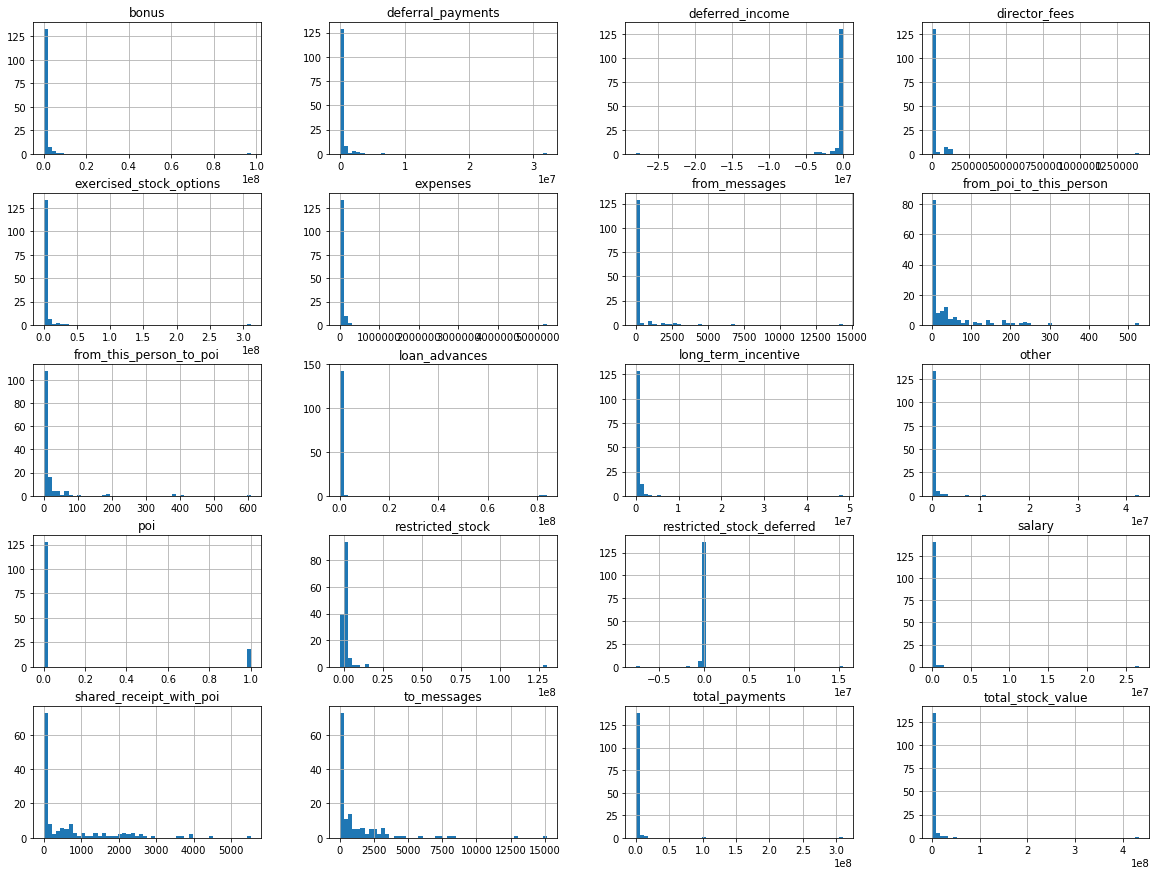

In [70]:
%matplotlib inline  
import matplotlib.pyplot as plt
x_plot = df_plot.from_poi_to_this_person.astype(float).fillna(0.0)
y_plot = df_plot.bonus.astype(float).fillna(0.0)

df_plot = df_plot.astype(float).fillna(0.0)
df_plot.hist(bins=50, figsize=(20,15))

#np_plot = featureFormat( df_plot, remove_NaN=True, sort_keys = False)
#nf_plot.hist(bins=50, figsize=(20,15))
plt.show()


In [78]:
df_new_poi = df_plot.where(df_plot["poi"] == False)
df_new_poi

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000.0,2869717.0,-3081055.0,0.0,1729541.0,13868.0,2195.0,47.0,65.0,0.0,304805.0,152.0,0.0,126027.0,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0
BADUM JAMES P,0.0,178980.0,0.0,0.0,257817.0,3486.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,182466.0,257817.0
BANNANTINE JAMES M,0.0,0.0,-5104.0,0.0,4046157.0,56301.0,29.0,39.0,0.0,0.0,0.0,864523.0,0.0,1757552.0,-560222.0,477.0,465.0,566.0,916197.0,5243487.0
BAXTER JOHN C,1200000.0,1295738.0,-1386055.0,0.0,6680544.0,11200.0,0.0,0.0,0.0,0.0,1586055.0,2660303.0,0.0,3942714.0,0.0,267102.0,0.0,0.0,5634343.0,10623258.0
BAY FRANKLIN R,400000.0,260455.0,-201641.0,0.0,0.0,129142.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,145796.0,-82782.0,239671.0,0.0,0.0,827696.0,63014.0
BAZELIDES PHILIP J,0.0,684694.0,0.0,0.0,1599641.0,0.0,0.0,0.0,0.0,0.0,93750.0,874.0,0.0,0.0,0.0,80818.0,0.0,0.0,860136.0,1599641.0
BECK SALLY W,700000.0,0.0,0.0,0.0,0.0,37172.0,4343.0,144.0,386.0,0.0,0.0,566.0,0.0,126027.0,0.0,231330.0,2639.0,7315.0,969068.0,126027.0
BELDEN TIMOTHY N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BELFER ROBERT,0.0,-102500.0,0.0,3285.0,3285.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44093.0,0.0,0.0,0.0,102500.0,-44093.0
BERBERIAN DAVID,0.0,0.0,0.0,0.0,1624396.0,11892.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,869220.0,0.0,216582.0,0.0,0.0,228474.0,2493616.0


In [84]:
df_plot_sorted = df_plot.sort_values(by=['total_payments'], ascending=[False])
df_plot_sorted
#df_plot.index[[1,3]], inplace=True)
#df_plot.plot(kind="scatter", x="poi", y="bonus", alpha=0.1)

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
TOTAL,97343619.0,32083396.0,-27992891.0,1398517.0,311764000.0,5235198.0,0.0,0.0,0.0,83925000.0,48521928.0,42667589.0,0.0,130322299.0,-7576788.0,26704229.0,0.0,0.0,309886585.0,434509511.0
LAY KENNETH L,7000000.0,202911.0,-300000.0,0.0,34348384.0,99832.0,36.0,123.0,16.0,81525000.0,3600000.0,10359729.0,1.0,14761694.0,0.0,1072321.0,2411.0,4273.0,103559793.0,49110078.0
FREVERT MARK A,2000000.0,6426990.0,-3367011.0,0.0,10433518.0,86987.0,21.0,242.0,6.0,2000000.0,1617011.0,7427621.0,0.0,4188667.0,0.0,1060932.0,2979.0,3275.0,17252530.0,14622185.0
BHATNAGAR SANJAY,0.0,0.0,0.0,137864.0,2604490.0,0.0,29.0,0.0,1.0,0.0,0.0,137864.0,0.0,-2604490.0,15456290.0,0.0,463.0,523.0,15456290.0,0.0
LAVORATO JOHN J,8000000.0,0.0,0.0,0.0,4158995.0,49537.0,2585.0,528.0,411.0,0.0,2035380.0,1552.0,0.0,1008149.0,0.0,339288.0,3962.0,7259.0,10425757.0,5167144.0
SKILLING JEFFREY K,5600000.0,0.0,0.0,0.0,19250000.0,29336.0,108.0,88.0,30.0,0.0,1920000.0,22122.0,1.0,6843672.0,0.0,1111258.0,2042.0,3627.0,8682716.0,26093672.0
MARTIN AMANDA K,0.0,85430.0,0.0,0.0,2070306.0,8211.0,230.0,8.0,0.0,0.0,5145434.0,2818454.0,0.0,0.0,0.0,349487.0,477.0,1522.0,8407016.0,2070306.0
BAXTER JOHN C,1200000.0,1295738.0,-1386055.0,0.0,6680544.0,11200.0,0.0,0.0,0.0,0.0,1586055.0,2660303.0,0.0,3942714.0,0.0,267102.0,0.0,0.0,5634343.0,10623258.0
BELDEN TIMOTHY N,5249999.0,2144013.0,-2334434.0,0.0,953136.0,17355.0,484.0,228.0,108.0,0.0,0.0,210698.0,1.0,157569.0,0.0,213999.0,5521.0,7991.0,5501630.0,1110705.0
DELAINEY DAVID W,3000000.0,0.0,0.0,0.0,2291113.0,86174.0,3069.0,66.0,609.0,0.0,1294981.0,1661.0,1.0,1323148.0,0.0,365163.0,2097.0,3093.0,4747979.0,3614261.0


In [91]:
df_plot_sorted.drop(df_plot_sorted.index[[0,1]], inplace=True)

In [92]:
df_plot_sorted

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
BHATNAGAR SANJAY,0.0,0.0,0.0,137864.0,2604490.0,0.0,29.0,0.0,1.0,0.0,0.0,137864.0,0.0,-2604490.0,15456290.0,0.0,463.0,523.0,15456290.0,0.0
LAVORATO JOHN J,8000000.0,0.0,0.0,0.0,4158995.0,49537.0,2585.0,528.0,411.0,0.0,2035380.0,1552.0,0.0,1008149.0,0.0,339288.0,3962.0,7259.0,10425757.0,5167144.0
SKILLING JEFFREY K,5600000.0,0.0,0.0,0.0,19250000.0,29336.0,108.0,88.0,30.0,0.0,1920000.0,22122.0,1.0,6843672.0,0.0,1111258.0,2042.0,3627.0,8682716.0,26093672.0
MARTIN AMANDA K,0.0,85430.0,0.0,0.0,2070306.0,8211.0,230.0,8.0,0.0,0.0,5145434.0,2818454.0,0.0,0.0,0.0,349487.0,477.0,1522.0,8407016.0,2070306.0
BAXTER JOHN C,1200000.0,1295738.0,-1386055.0,0.0,6680544.0,11200.0,0.0,0.0,0.0,0.0,1586055.0,2660303.0,0.0,3942714.0,0.0,267102.0,0.0,0.0,5634343.0,10623258.0
BELDEN TIMOTHY N,5249999.0,2144013.0,-2334434.0,0.0,953136.0,17355.0,484.0,228.0,108.0,0.0,0.0,210698.0,1.0,157569.0,0.0,213999.0,5521.0,7991.0,5501630.0,1110705.0
DELAINEY DAVID W,3000000.0,0.0,0.0,0.0,2291113.0,86174.0,3069.0,66.0,609.0,0.0,1294981.0,1661.0,1.0,1323148.0,0.0,365163.0,2097.0,3093.0,4747979.0,3614261.0
WHALLEY LAWRENCE G,3000000.0,0.0,0.0,0.0,3282960.0,57838.0,556.0,186.0,24.0,0.0,808346.0,301026.0,0.0,2796177.0,0.0,510364.0,3920.0,6019.0,4677574.0,6079137.0
ALLEN PHILLIP K,4175000.0,2869717.0,-3081055.0,0.0,1729541.0,13868.0,2195.0,47.0,65.0,0.0,304805.0,152.0,0.0,126027.0,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0
SHERRIFF JOHN R,1500000.0,0.0,0.0,0.0,1835558.0,0.0,92.0,28.0,23.0,0.0,554422.0,1852186.0,0.0,1293424.0,0.0,428780.0,2103.0,3187.0,4335388.0,3128982.0


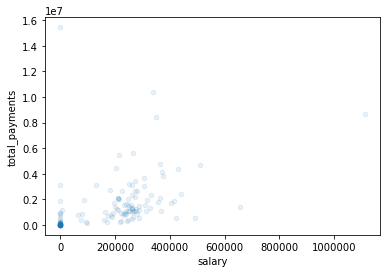

In [99]:
df_plot_sorted.plot(kind="scatter", x="salary", y="total_payments", alpha=0.1)

In [100]:
df_plot.index

Index([u'ALLEN PHILLIP K', u'BADUM JAMES P', u'BANNANTINE JAMES M',
       u'BAXTER JOHN C', u'BAY FRANKLIN R', u'BAZELIDES PHILIP J',
       u'BECK SALLY W', u'BELDEN TIMOTHY N', u'BELFER ROBERT',
       u'BERBERIAN DAVID',
       ...
       u'WASAFF GEORGE', u'WESTFAHL RICHARD K', u'WHALEY DAVID A',
       u'WHALLEY LAWRENCE G', u'WHITE JR THOMAS E', u'WINOKUR JR. HERBERT S',
       u'WODRASKA JOHN', u'WROBEL BRUCE', u'YEAGER F SCOTT', u'YEAP SOON'],
      dtype='object', length=146)

In [101]:
df.index

Index([u'bonus', u'deferral_payments', u'deferred_income', u'director_fees',
       u'email_address', u'exercised_stock_options', u'expenses',
       u'from_messages', u'from_poi_to_this_person',
       u'from_this_person_to_poi', u'loan_advances', u'long_term_incentive',
       u'other', u'poi', u'restricted_stock', u'restricted_stock_deferred',
       u'salary', u'shared_receipt_with_poi', u'to_messages',
       u'total_payments', u'total_stock_value'],
      dtype='object')

In [125]:
#features_list = df.index.values
features_list = ['poi','salary']
#features_list
df_plot_sorted.head()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
BHATNAGAR SANJAY,0.0,0.0,0.0,137864.0,2604490.0,0.0,29.0,0.0,1.0,0.0,0.0,137864.0,0.0,-2604490.0,15456290.0,0.0,463.0,523.0,15456290.0,0.0
LAVORATO JOHN J,8000000.0,0.0,0.0,0.0,4158995.0,49537.0,2585.0,528.0,411.0,0.0,2035380.0,1552.0,0.0,1008149.0,0.0,339288.0,3962.0,7259.0,10425757.0,5167144.0
SKILLING JEFFREY K,5600000.0,0.0,0.0,0.0,19250000.0,29336.0,108.0,88.0,30.0,0.0,1920000.0,22122.0,1.0,6843672.0,0.0,1111258.0,2042.0,3627.0,8682716.0,26093672.0
MARTIN AMANDA K,0.0,85430.0,0.0,0.0,2070306.0,8211.0,230.0,8.0,0.0,0.0,5145434.0,2818454.0,0.0,0.0,0.0,349487.0,477.0,1522.0,8407016.0,2070306.0
BAXTER JOHN C,1200000.0,1295738.0,-1386055.0,0.0,6680544.0,11200.0,0.0,0.0,0.0,0.0,1586055.0,2660303.0,0.0,3942714.0,0.0,267102.0,0.0,0.0,5634343.0,10623258.0


In [124]:
data = featureFormat(df_plot_sorted, features_list, sort_keys = True)
#labels, features = targetFeatureSplit(data)

error: key  bonus  not present
